In [153]:
#import libraries
import os
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import joblib

%matplotlib inline

import pandas_profiling


from scipy.stats import skew, norm
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV, ElasticNet, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, classification_report, accuracy_score
from math import sqrt

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt



from lightgbm import LGBMRegressor
import lightgbm as lgb

np.random.seed(0)

In [154]:
#import data
current_path = os.getcwd()
current_path = os.path.dirname(current_path)
print(current_path)
#C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone\data_mart
dataset = current_path + '//data_mart//reporting_rb.csv'
cities = current_path + '//data_mart//facts_cities_metrics.csv'
college = current_path + '//data_mart//facts_college_metrics.csv'

dimc_file = current_path + '//data_mart//dimensions_cities.csv'
dimco_file = current_path + '//data_mart//dimensions_colleges.csv'
dimp_file = current_path + '//data_mart//dimensions_players.csv'




print(dataset)
city_dim = pd.read_csv(dimc_file)
college_dim = pd.read_csv(dimco_file)
player_dim = pd.read_csv(dimp_file)

dataset = pd.read_csv(dataset)
college_df = pd.read_csv(college)
city_df = pd.read_csv(cities)


#https://stackoverflow.com/questions/9856683/using-pythons-os-path-how-do-i-go-up-one-directory

C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone
C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone//data_mart//reporting_rb.csv


In [155]:
for x in dataset.columns:
    print(x)
    #print(dataset[x].describe)
    #print('-----')

fms_id
espn_id
fms_college_id
fms_city_id
full_name
first_name
last_name
position
position_group
section
college
conference
draft_year
selection_number
position_rank
position_group_rank
section_rank
drafting_team
home_city
home_state
home_country
college_weight_pounds
college_height_inches
hw_ratio
forty
vertical
bench
broad
threecone
shuttle
rushing_games
rushing_rec_td
rushing_rec_yards
rushing_receptions
rushing_rush_att
rushing_rush_td
rushing_rush_yds
rushing_scrim_plays
rushing_scrim_tds
rushing_scrim_yds
rushing_seasons
rb_college_weight_pounds_zscore
rb_college_height_inches_zscore
rb_hw_ratio_zscore
rb_forty_zscore
rb_vertical_zscore
rb_bench_zscore
rb_broad_zscore
rb_threecone_zscore
rb_shuttle_zscore
rb_rushing_games_zscore
rb_rushing_rec_td_zscore
rb_rushing_rec_yards_zscore
rb_rushing_receptions_zscore
rb_rushing_rush_att_zscore
rb_rushing_rush_td_zscore
rb_rushing_rush_yds_zscore
rb_rushing_scrim_plays_zscore
rb_rushing_scrim_tds_zscore
rb_rushing_scrim_yds_zscore
rb_rush

In [156]:
#determine which columns have None values
none_columns = []
for x in dataset.columns:
    if dataset[x].isnull().values.any() == True:
        none_columns.append(x)
print(none_columns)

['espn_id', 'conference', 'selection_number', 'position_rank', 'position_group_rank', 'section_rank', 'drafting_team', 'home_city', 'home_state', 'home_country', 'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle', 'rb_forty_zscore', 'rb_vertical_zscore', 'rb_bench_zscore', 'rb_broad_zscore', 'rb_threecone_zscore', 'rb_shuttle_zscore', 'rb_max_madden_zscore', 'rb_rushing_rec_td_pg_zscore', 'rb_rushing_rec_yards_pg_zscore', 'rb_rushing_receptions_pg_zscore', 'rb_rushing_rush_att_pg_zscore', 'rb_rushing_rush_td_pg_zscore', 'rb_rushing_rush_yds_pg_zscore', 'rb_rushing_scrim_plays_pg_zscore', 'rb_rushing_scrim_tds_pg_zscore', 'rb_rushing_scrim_yds_pg_zscore', 'rb_football_spending_zscore', 'rb_coaches_salaries_zscore', 'rb_ticket_sales_zscore', 'rb_rushing_rush_td_pg_cf_scaled_zscore', 'rb_rushing_rush_yds_pg_cf_scaled_zscore', 'rb_rushing_scrim_plays_pg_cf_scaled_zscore', 'rb_rushing_scrim_tds_pg_cf_scaled_zscore', 'rb_rushing_scrim_yds_pg_cf_scaled_zscore', 'max_madden']


In [157]:
#Deal with None Values
none_dict = {'espn_id': 0, 
    'conference':  'non_power_five',
    'selection_number': 400,
    'position_rank': 400,
    'position_group_rank': 400,
    'section_rank': 400,
    'drafting_team': 'No Team',
    'home_city': 'No City',
    'home_state': 'No State',
    'home_country': 'USA',
    'forty': dataset['forty'].mean(),
    'vertical': dataset['vertical'].mean(), 
    'bench': dataset['bench'].mean(), 
    'broad': dataset['broad'].mean(),
    'threecone': dataset['threecone'].mean(),
    'shuttle': dataset['shuttle'].mean(),
    'rb_football_spending': dataset['shuttle'].mean(), 
    'rb_coaches_salaries': dataset['shuttle'].mean(), 
    'rb_ticket_sales': dataset['shuttle'].mean(), 
    'rb_poverty_pct': dataset['shuttle'].mean(), 
    'rb_med_income': dataset['shuttle'].mean(),
    'max_madden': dataset['max_madden'].min() - 10,
    'rb_forty_zscore': 0, 
    'rb_vertical_zscore': 0, 
    'rb_bench_zscore': 0, 
    'rb_broad_zscore': 0, 
    'rb_threecone_zscore': 0, 
    'rb_shuttle_zscore': 0, 
    
    'rb_max_madden_zscore': dataset['rb_max_madden_zscore'].min() - 0.1,
    'rb_rushing_rec_td_pg_zscore': 0, 
    'rb_rushing_rec_yards_pg_zscore': 0, 
    'rb_rushing_receptions_pg_zscore': 0, 
    'rb_rushing_rush_att_pg_zscore': 0, 
    'rb_rushing_rush_td_pg_zscore': 0, 
    'rb_rushing_rush_yds_pg_zscore': 0, 
    'rb_rushing_scrim_plays_pg_zscore': 0, 
    'rb_rushing_scrim_tds_pg_zscore': 0, 
    'rb_rushing_scrim_yds_pg_zscore': 0,
    'rb_rushing_rush_td_pg_cf_scaled_zscore': 0, 
    'rb_rushing_rush_yds_pg_cf_scaled_zscore': 0, 
    'rb_rushing_scrim_plays_pg_cf_scaled_zscore': 0, 
    'rb_rushing_scrim_tds_pg_cf_scaled_zscore': 0,
    'rb_rushing_scrim_yds_pg_cf_scaled_zscore': 0,
             
    'rb_football_spending_zscore': 0, 
    'rb_coaches_salaries_zscore':  0, 
    'rb_ticket_sales_zscore':  0}

print(none_dict)

for none_col in none_columns:
    dataset[none_col] = dataset[none_col].fillna(none_dict[none_col])
   

#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

{'espn_id': 0, 'conference': 'non_power_five', 'selection_number': 400, 'position_rank': 400, 'position_group_rank': 400, 'section_rank': 400, 'drafting_team': 'No Team', 'home_city': 'No City', 'home_state': 'No State', 'home_country': 'USA', 'forty': 4.555525291828793, 'vertical': 34.36480186480186, 'bench': 19.435323383084576, 'broad': 118.0190023752969, 'threecone': 7.062059800664453, 'shuttle': 4.263355263157894, 'rb_football_spending': 4.263355263157894, 'rb_coaches_salaries': 4.263355263157894, 'rb_ticket_sales': 4.263355263157894, 'rb_poverty_pct': 4.263355263157894, 'rb_med_income': 4.263355263157894, 'max_madden': 47.0, 'rb_forty_zscore': 0, 'rb_vertical_zscore': 0, 'rb_bench_zscore': 0, 'rb_broad_zscore': 0, 'rb_threecone_zscore': 0, 'rb_shuttle_zscore': 0, 'rb_max_madden_zscore': -2.1117285814998112, 'rb_rushing_rec_td_pg_zscore': 0, 'rb_rushing_rec_yards_pg_zscore': 0, 'rb_rushing_receptions_pg_zscore': 0, 'rb_rushing_rush_att_pg_zscore': 0, 'rb_rushing_rush_td_pg_zscore':

In [158]:
#create categories for Madden Scores
def f(row):
    if row['max_madden'] >= 90 : val = 90
    elif row['max_madden'] < 90 and row['max_madden'] >= 80 : val = 80
    elif row['max_madden'] < 80 and row['max_madden'] >= 70 : val = 70  
    elif row['max_madden'] < 70 and row['max_madden'] >= 60 : val = 60
    elif row['max_madden'] < 60 and row['max_madden'] >= 50 : val = 50
    elif row['max_madden'] < 50 and row['max_madden'] >= 40 : val = 40
    else: val = 40
    return val
dataset['madden_cat'] = dataset.apply(f, axis=1)





"""

def f_avg_min(row):
    avg_min = (row['min_jan'] + row['min_feb'] + row['min_mar'] + row['min_apr'] + row['min_may'] + row['min_jun'] + row['min_jul'] + row['min_aug'] + row['min_sep'] + row['min_oct'] + row['min_nov'] + row['min_dec'])/12
    return avg_min

def f_avg_max(row):
    avg_max = (row['max_jan'] + row['max_feb'] + row['max_mar'] + row['max_apr'] + row['max_may'] + row['max_jun'] + row['max_jul'] + row['max_aug'] + row['max_sep'] + row['max_oct'] + row['max_nov'] + row['max_dec'])/12
    return avg_max

dataset['avg_min'] = dataset.apply(f_avg_min, axis=1)


dataset['avg_max'] = dataset.apply(f_avg_max, axis=1)
"""





"\n\ndef f_avg_min(row):\n    avg_min = (row['min_jan'] + row['min_feb'] + row['min_mar'] + row['min_apr'] + row['min_may'] + row['min_jun'] + row['min_jul'] + row['min_aug'] + row['min_sep'] + row['min_oct'] + row['min_nov'] + row['min_dec'])/12\n    return avg_min\n\ndef f_avg_max(row):\n    avg_max = (row['max_jan'] + row['max_feb'] + row['max_mar'] + row['max_apr'] + row['max_may'] + row['max_jun'] + row['max_jul'] + row['max_aug'] + row['max_sep'] + row['max_oct'] + row['max_nov'] + row['max_dec'])/12\n    return avg_max\n\ndataset['avg_min'] = dataset.apply(f_avg_min, axis=1)\n\n\ndataset['avg_max'] = dataset.apply(f_avg_max, axis=1)\n"

In [159]:
####REMOVE ALL NO MADDEN SCORES thru 2014 and keep all NO MADDEN SCORES 2015 forward
#determine % of no madden scores wanted
no_madden_percentage = .25

no_madden_df = dataset.loc[dataset['madden_cat'] == 40]
madden_df = dataset.loc[dataset['madden_cat'] != 40]

print(no_madden_df.shape)
print(madden_df.shape)

current_no_madden_percentage = no_madden_df.shape[0] / dataset.shape[0] - no_madden_percentage
print(current_no_madden_percentage)

for x in set(dataset['draft_year'].values):
    if x in [2015, 2016, 2017, 2018, 2019]:
        year_df = no_madden_df.loc[dataset['draft_year'] == x]
        madden_df = madden_df.append(year_df)


dataset = madden_df
print(dataset.shape)
dataset.head()
dataset = shuffle(dataset)
dataset.head()

#https://stackoverflow.com/questions/28556942/pandas-remove-rows-at-random-without-shuffling-dataset

(206, 103)
(321, 103)
0.1408918406072106
(340, 103)


,fms_id,espn_id,fms_college_id,fms_city_id,full_name,first_name,last_name,position,position_group,section,...,rb_max_jun_zscore,rb_max_jul_zscore,rb_max_aug_zscore,rb_rushing_rush_td_pg_cf_scaled_zscore,rb_rushing_rush_yds_pg_cf_scaled_zscore,rb_rushing_scrim_plays_pg_cf_scaled_zscore,rb_rushing_scrim_tds_pg_cf_scaled_zscore,rb_rushing_scrim_yds_pg_cf_scaled_zscore,max_madden,madden_cat
263,2324,0.0,126,2116.0,Javarris James,Javarris,James,RB,RB,O,...,0.885000,0.567125,0.700766,-0.885772,-0.875079,-0.413986,-0.989712,-0.832297,64.0,60
328,79,0.0,122,1490.0,Ahmad Bradshaw,Ahmad,Bradshaw,RB,RB,O,...,0.005604,-0.112909,-0.105814,0.194170,0.048760,0.215575,0.338146,0.212248,88.0,80
237,2235,0.0,48,627.0,Jamie Harper,Jamie,Harper,RB,RB,O,...,0.437006,0.397117,0.279145,-1.151869,-1.406167,-1.020553,-1.076402,-1.344640,65.0,60
336,1882,0.0,166,807.0,Garrett Wolfe,Garrett,Wolfe,RB,RB,O,...,-0.691275,-0.868503,-1.077376,1.769357,2.089355,1.293606,1.847470,1.985796,69.0,60
398,4242,0.0,119,2871.0,Ryan Moats,Ryan,Moats,RB,RB,O,...,0.702484,0.699354,0.865748,-0.092629,0.084737,-0.343473,-0.156507,0.015045,68.0,60


In [160]:
dataset.columns[20:]

Index(['home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons',
       'rb_college_weight_pounds_zscore', 'rb_college_height_inches_zscore',
       'rb_hw_ratio_zscore', 'rb_forty_zscore', 'rb_vertical_zscore',
       'rb_bench_zscore', 'rb_broad_zscore', 'rb_threecone_zscore',
       'rb_shuttle_zscore', 'rb_rushing_games_zscore',
       'rb_rushing_rec_td_zscore', 'rb_rushing_rec_yards_zscore',
       'rb_rushing_receptions_zscore', 'rb_rushing_rush_att_zscore',
       'rb_rushing_rush_td_zscore', 'rb_rushing_rush_yds_zscore',
       'rb_rushing_scrim_plays_zscore', 'rb_rushing_scrim_tds_zscore',
       'rb_rushing_scrim_yds_zscore', 'rb_rushing_seas

In [161]:

#Total Features
"""['espn_id', 'fms_college_id', 'fms_city_id', 'full_name',
       'first_name', 'last_name', 'position', 'position_group', 'section',
       'college', 'conference', 'draft_year', 'selection_number',
       'position_rank', 'position_group_rank', 'section_rank', 'drafting_team',
       'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons',
       'rb_college_weight_pounds_zscore', 'rb_college_height_inches_zscore',
       'rb_hw_ratio_zscore', 'rb_forty_zscore', 'rb_vertical_zscore',
       'rb_bench_zscore', 'rb_broad_zscore', 'rb_threecone_zscore',
       'rb_shuttle_zscore', 'rb_rushing_games_zscore',
       'rb_rushing_rec_td_zscore', 'rb_rushing_rec_yards_zscore',
       'rb_rushing_receptions_zscore', 'rb_rushing_rush_att_zscore',
       'rb_rushing_rush_td_zscore', 'rb_rushing_rush_yds_zscore',
       'rb_rushing_scrim_plays_zscore', 'rb_rushing_scrim_tds_zscore',
       'rb_rushing_scrim_yds_zscore', 'rb_rushing_seasons_zscore',
       'rb_max_madden_zscore', 'rb_rushing_rec_td_pg_zscore',
       'rb_rushing_rec_yards_pg_zscore', 'rb_rushing_receptions_pg_zscore',
       'rb_rushing_rush_att_pg_zscore', 'rb_rushing_rush_td_pg_zscore',
       'rb_rushing_rush_yds_pg_zscore', 'rb_rushing_scrim_plays_pg_zscore',
       'rb_rushing_scrim_tds_pg_zscore', 'rb_rushing_scrim_yds_pg_zscore',
       'rb_football_spending_zscore', 'rb_coaches_salaries_zscore',
       'rb_ticket_sales_zscore', 'rb_ann_rain_inch_zscore',
       'rb_ann_snow_inch_zscore', 'rb_min_jan_zscore', 'rb_min_feb_zscore',
       'rb_min_mar_zscore', 'rb_min_apr_zscore', 'rb_min_may_zscore',
       'rb_min_jun_zscore', 'rb_min_jul_zscore', 'rb_min_aug_zscore',
       'rb_min_sep_zscore', 'rb_min_oct_zscore', 'rb_min_nov_zscore',
       'rb_min_dec_zscore', 'rb_max_jan_zscore', 'rb_max_feb_zscore',
       'rb_max_mar_zscore', 'rb_max_apr_zscore', 'rb_max_may_zscore',
       'rb_max_jun_zscore', 'rb_max_jul_zscore', 'rb_max_aug_zscore',
       'rb_rushing_rush_td_pg_cf_scaled_zscore',
       'rb_rushing_rush_yds_pg_cf_scaled_zscore',
       'rb_rushing_scrim_plays_pg_cf_scaled_zscore',
       'rb_rushing_scrim_tds_pg_cf_scaled_zscore',
       'rb_rushing_scrim_yds_pg_cf_scaled_zscore', 'max_madden']"""





# 'college_weight_pounds', 'college_height_inches'


features = ['college_weight_pounds', 'college_height_inches', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'ann_rain_inch', 'ann_snow_inch',
       'min_jan', 'min_feb',
       'min_mar', 'min_apr', 'min_may', 'min_jun', 'min_jul', 'min_aug',
       'min_sep', 'min_oct', 'min_nov', 'min_dec', 'max_jan', 'max_feb',
       'max_mar', 'max_apr', 'max_may', 'max_jun', 'max_jul', 'max_aug',
       'max_sep', 'max_oct', 'max_nov', 'max_dec']

z_features = ['rb_college_weight_pounds_zscore', 'rb_college_height_inches_zscore',
       'rb_forty_zscore', 'rb_vertical_zscore',
       'rb_bench_zscore', 'rb_broad_zscore', 'rb_threecone_zscore',
       'rb_shuttle_zscore', 'rb_rushing_games_zscore', 
       'rb_ann_snow_inch_zscore', 'rb_ann_rain_inch_zscore', 'rb_min_jan_zscore', 'rb_min_feb_zscore',
       'rb_min_mar_zscore', 'rb_min_apr_zscore', 'rb_min_may_zscore',
       'rb_min_jun_zscore', 'rb_min_jul_zscore', 'rb_min_aug_zscore',
       'rb_min_sep_zscore', 'rb_min_oct_zscore', 'rb_min_nov_zscore',
       'rb_min_dec_zscore', 'rb_max_jan_zscore', 'rb_max_feb_zscore',
       'rb_max_mar_zscore', 'rb_max_apr_zscore', 'rb_max_may_zscore',
       'rb_max_jun_zscore', 'rb_max_jul_zscore', 'rb_max_aug_zscore',
       'rb_rushing_rec_td_zscore', 'rb_rushing_receptions_zscore', 'rb_rushing_rush_att_zscore',
       'rb_rushing_rush_td_pg_cf_scaled_zscore',
       'rb_rushing_rush_yds_pg_cf_scaled_zscore',
       'rb_rushing_scrim_plays_pg_cf_scaled_zscore',
       'rb_rushing_scrim_tds_pg_cf_scaled_zscore',
       'rb_rushing_scrim_yds_pg_cf_scaled_zscore']

limited_features = ['rb_forty_zscore', 'rb_rushing_scrim_tds_pg_cf_scaled_zscore',
       'rb_college_weight_pounds_zscore', 'rb_vertical_zscore',
       'rb_rushing_scrim_yds_pg_cf_scaled_zscore',
       'rb_rushing_rush_att_zscore', 'rb_ann_rain_inch_zscore',
       'rb_rushing_rush_td_pg_cf_scaled_zscore',
       'rb_rushing_receptions_zscore', 'rb_bench_zscore',
       'rb_rushing_games_zscore', 'rb_broad_zscore', 'rb_threecone_zscore',
       'rb_rushing_scrim_plays_pg_cf_scaled_zscore',
       'rb_college_height_inches_zscore']

#Create by game by conference per game stats
def game_avg(row):
    stats_list = ['rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td', 'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds']
    if row['rushing_games'] == 0:
        pass
    else:
        for stat in stats_list:
            
#{'acc', 'big_10', 'big_12', 'mountain_west', 'non_power_five', 'pac_12', 'sec'}
            if   row['conference'] == 'sec':  row[stat] = row[stat]/row['rushing_games'] * 1
            elif row['conference'] == 'acc':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_10':  row[stat] = row[stat]/row['rushing_games'] * .9
            elif row['conference'] == 'big_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'pac_12':  row[stat] = row[stat]/row['rushing_games'] * .8
            elif row['conference'] == 'mountain_west':  row[stat] = row[stat]/row['rushing_games'] * .75
            elif row['conference'] == 'non_power_five':  row[stat] = row[stat]/row['rushing_games'] * .6
        
            
            
    return row


#use by game stats?
game_averages = 'Y'
if game_averages == 'Y':
    dataset = dataset.apply(game_avg, axis=1)
else: pass

df_list = []
mean_list = []
std_list = []
col_list = []
for col in dataset[features].columns:
    col_list.append(col)
    mean_list.append(dataset[col].mean())
    std_list.append(dataset[col].std())
df_list.append(mean_list)
df_list.append(std_list)

df_mean_std = pd.DataFrame(df_list, columns=col_list, index = ['mean', 'std'])
df_mean_std.to_csv('rb_mean_std_features.csv')

In [162]:
#select year to hold out
holdout_year = 2015
#pick features from above
features_list = limited_features




#z_score features
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden'].values)

#for col in dataset[features_list].columns:
#    dataset[col] = stats.zscore(dataset[col].values)



#prediction feature
#prediction_feature = 'max_madden'
#dataset['max_madden_zscore'] = stats.zscore(dataset['max_madden_zscore'].values)
#max_mean = dataset['max_madden'].mean()
#max_std = dataset['max_madden'].std()
#prediction_feature = 'max_madden'

prediction_feature = 'madden_cat'
features_list.append(prediction_feature)






#create a train and test df based on the hold out year
test_basis = 'hold_out'
if test_basis == 'hold_out':
    test_df = dataset.loc[dataset['draft_year'] == holdout_year]
    train_df = dataset.loc[dataset['draft_year'] != holdout_year]

if test_basis != 'hold_out':
    dataset = shuffle(dataset)
    split= .9
    train_df = dataset[:int(dataset.shape[0]*split)]
    test_df = dataset[int(dataset.shape[0]*split):]


#shuffle the dataset
test_df = shuffle(test_df)
train_df = shuffle(train_df)

#create a copy of the dataset with that feature set
test_df_feat = test_df[features_list].copy()
train_df_feat = train_df[features_list].copy()

In [163]:
X_train, Y_train = train_df_feat[:].drop([prediction_feature], axis =1), train_df_feat.pop(prediction_feature)
X_validation, Y_validation = test_df_feat[:].drop([prediction_feature], axis =1), test_df_feat.pop(prediction_feature)

In [164]:
X_train.columns

Index(['rb_forty_zscore', 'rb_rushing_scrim_tds_pg_cf_scaled_zscore',
       'rb_college_weight_pounds_zscore', 'rb_vertical_zscore',
       'rb_rushing_scrim_yds_pg_cf_scaled_zscore',
       'rb_rushing_rush_att_zscore', 'rb_ann_rain_inch_zscore',
       'rb_rushing_rush_td_pg_cf_scaled_zscore',
       'rb_rushing_receptions_zscore', 'rb_bench_zscore',
       'rb_rushing_games_zscore', 'rb_broad_zscore', 'rb_threecone_zscore',
       'rb_rushing_scrim_plays_pg_cf_scaled_zscore',
       'rb_college_height_inches_zscore'],
      dtype='object')

In [165]:
   # Plot feature importance
def plot_feat_import(coef, model_title):
    feature_coef = pd.Series(index=X_train.columns, data=coef)
    print('{} model picked {} out of {} features'.format(model_title, str(sum(feature_coef != 0)), str(X_train.shape[1])))
    top_bottom_10 = pd.concat([feature_coef.sort_values().head(10), feature_coef.sort_values().tail(10)])
    #top_bottom_10 = feature_coef.sort_values()
    top_bottom_10.plot(kind='barh', title='Feature importance (Top and bottom 10) - {} model'.format(model_title))
    #from W207 project (Fleishman, Hilton, Niu)
    
def print_results(true_val, predict_val):
    print('Accuracy:  ' + str(accuracy_score(true_val, predict_val)))
    print('R2 : ' + str(r2_score(true_val, predict_val)))
    print('MSE : ' + str(mean_squared_error(true_val, predict_val)))
    

def plot_confusion(mat, model):
    
    array = mat
    df_cm = pd.DataFrame(array, index = [i for i in class_names],
                      columns = [i for i in class_names])
    plt.figure(figsize = (10,7))
    plt.title(model)
    sn.heatmap(df_cm, annot=True, cmap="Blues")


#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    
    
class_names = sorted(list(set(dataset[prediction_feature].values)))

In [166]:
sorted(list(set(dataset[prediction_feature].values)))

[40, 50, 60, 70, 80, 90]

In [167]:
result_df = test_df[['full_name', prediction_feature, 'position_group_rank']].copy()
print(result_df)
def result_df_viz(df, predictions, model_name):
    
    df[model_name] = predictions
    
    return df

               full_name  madden_cat  position_group_rank
124        Marcus Murphy          70                 18.0
132         Thomas Rawls          80                 30.0
113             Dee Hart          40                 24.0
111  Cameron Artis-Payne          70                 16.0
134        Trey Williams          60                 31.0
133          Todd Gurley          80                  1.0
122       Kenny Hilliard          60                 20.0
128           Mike Davis          70                 11.0
131        Tevin Coleman          80                  5.0
119      Jeremy Langford          70                  8.0
120        Josh Robinson          60                 17.0
110        Braylon Heard          40                 23.0
117       Javorius Allen          70                 10.0
109         B.J. Catalon          40                 22.0
114      Dominique Brown          60                 25.0
121      Karlos Williams          60                 14.0
126        Mel

Accuracy:  0.5925925925925926
R2 : 0.4999999999999999
MSE : 74.07407407407408
AdaBoostRegressor model picked 15 out of 15 features
Index(['AdaBoost'], dtype='object')





























,full_name,AdaBoost,madden_cat,position_group_rank
126,Melvin Gordon,80.0,80,2.0
133,Todd Gurley,80.0,80,1.0
129,T.J. Yeldon,80.0,80,3.0
128,Mike Davis,80.0,70,11.0
131,Tevin Coleman,80.0,80,5.0
115,Duke Johnson,80.0,80,6.0
118,Jay Ajayi,80.0,80,13.0
125,Matt Jones,70.0,70,7.0
117,Javorius Allen,70.0,70,10.0
121,Karlos Williams,70.0,60,14.0


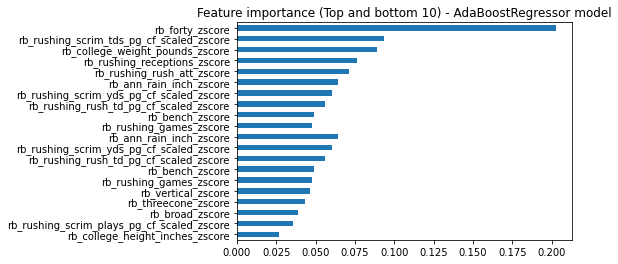

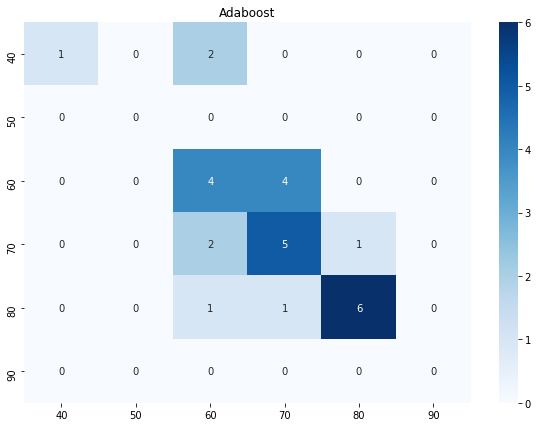

In [168]:
#Adaboost
adaboostregressor = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse'), n_estimators=100, loss='linear', learning_rate=1, random_state=1)
adaboostregressor.fit(X_train, Y_train)
madden_predict = adaboostregressor.predict(X_validation)

print_results(Y_validation, madden_predict)
plot_feat_import(adaboostregressor.feature_importances_, 'AdaBoostRegressor')
mat = confusion_matrix(Y_validation, madden_predict, labels = class_names)

plot_confusion(mat, 'Adaboost')
result_df_viz(result_df, madden_predict, 'AdaBoost')
from scipy.stats import rankdata
print(result_df.columns[3:])
rank_df = result_df[result_df.columns[3:]]

def rank(row):
    print()
    return row.sum()/len(row)
result_df['rank'] = rank_df.apply(rank, axis=1)
ordered_df = result_df[['full_name', 'AdaBoost', prediction_feature, 'position_group_rank']].sort_values(by=['AdaBoost'], ascending=False)
ordered_df



In [169]:

feature_coef = pd.Series(index=X_validation.columns, data=adaboostregressor.feature_importances_)
feature_coef  = feature_coef.sort_values(ascending=False)
print(feature_coef.index)
feature_coef.to_csv('rb_feature_importance.csv')

Index(['rb_forty_zscore', 'rb_rushing_scrim_tds_pg_cf_scaled_zscore',
       'rb_college_weight_pounds_zscore', 'rb_rushing_receptions_zscore',
       'rb_rushing_rush_att_zscore', 'rb_ann_rain_inch_zscore',
       'rb_rushing_scrim_yds_pg_cf_scaled_zscore',
       'rb_rushing_rush_td_pg_cf_scaled_zscore', 'rb_bench_zscore',
       'rb_rushing_games_zscore', 'rb_vertical_zscore', 'rb_threecone_zscore',
       'rb_broad_zscore', 'rb_rushing_scrim_plays_pg_cf_scaled_zscore',
       'rb_college_height_inches_zscore'],
      dtype='object')


In [170]:
ordered_df.to_csv('rank_of_picks.csv')
file_name = 'rb_model.pkl'
joblib.dump(adaboostregressor, file_name)



#https://www.kaggle.com/prmohanty/python-how-to-save-and-load-ml-models

['rb_model.pkl']